In [24]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    grad = np.zeros_like(x)
    grad[x>=0] = 1
    return grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def active_func(x):
    # return sigmoid(x)
    return relu(x)
    
def active_grad(x):
    # return sigmoid_grad(x)
    return relu_grad(x)

def softmax(x):
    x -= np.max(x, axis=-1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# 4 layers implentation of 
- We are using conda(Mini), not python3 directly
issues:
- is less than 91% 


In [39]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, hidden2_size, output_size, weight_init_std=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size
        
        # 随机初始化权重参数
        self.W1 = weight_init_std*np.random.randn(self.input_size, self.hidden_size)
        self.W2 = weight_init_std*np.random.randn(self.hidden_size, self.hidden2_size)
        self.W3 = weight_init_std*np.random.randn(self.hidden2_size, self.output_size)
        self.b1 = np.random.randn(self.hidden_size)
        self.b2 = np.random.randn(self.hidden2_size)
        self.b3 = np.random.randn(self.output_size)
    
    def forward(self, x):
        # 第一层
        a1 = np.dot(x, self.W1) + self.b1
        z1 = active_func(a1)
        
        # 第二层
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = active_func(a2)
        
        # 第三层
        a3 = np.dot(z2, self.W3) + self.b3
        y = softmax(a3)
        
        return y
    
    def loss(self, x, t):
        # 计算损失函数
        y = self.forward(x)
        loss = -np.sum(t*np.log(y+1e-7)) / x.shape[0]
        
        return loss
    
    def accuracy(self, x, t):
        y = self.forward(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def train(self, x, t, learning_rate=0.1):
        # 前向传播
        a1 = np.dot(x, self.W1) + self.b1
        z1 = active_func(a1)
        a2 = np.dot(z1, self.W2) + self.b2
        z2 = active_func(a2)
        a3 = np.dot(z2, self.W3) + self.b3
        y = softmax(a3)

        # backward
        dy = (y - t) / x.shape[0] # softmax 
        grad_W3 = np.dot(z2.T, dy)
        grad_b3 = np.sum(dy, axis=0)

        dz2 = np.dot(dy, self.W3.T)
        da2 = dz2 * active_grad(a2) # 修改
        grad_W2 = np.dot(z1.T, da2)
        grad_b2 = np.sum(da2, axis=0)

        dz1 = np.dot(da2, self.W2.T) # 修改
        da1 = dz1 * active_grad(a1) # 修改
        grad_W1 = np.dot(x.T, da1)
        grad_b1 = np.sum(da1, axis=0)

        # 更新参数
        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2
        self.W3 -= learning_rate * grad_W3
        self.b3 -= learning_rate * grad_b3

train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.8448, 0.8457
train acc, test acc | 0.9080333333333334, 0.9074
train acc, test acc | 0.9406166666666667, 0.9399
train acc, test acc | 0.95795, 0.9535
train acc, test acc | 0.9628, 0.9578
train acc, test acc | 0.9674833333333334, 0.9631
train acc, test acc | 0.97425, 0.9671
train acc, test acc | 0.9801666666666666, 0.9693
train acc, test acc | 0.9803, 0.9695
train acc, test acc | 0.9840166666666667, 0.9719
train acc, test acc | 0.98425, 0.9725
train acc, test acc | 0.98835, 0.9747
train acc, test acc | 0.9877666666666667, 0.9731
train acc, test acc | 0.9897666666666667, 0.975
train acc, test acc | 0.9924333333333333, 0.977
train acc, test acc | 0.9922333333333333, 0.9766


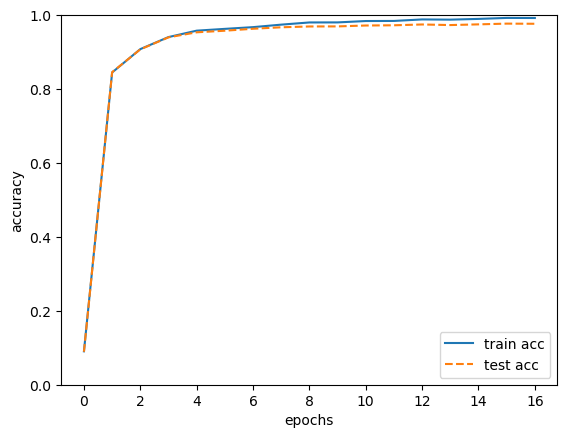

In [40]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = NeuralNetwork(input_size=784, hidden_size=256, hidden2_size=128, output_size=10, weight_init_std=0.01)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    network.train(x_batch, t_batch)
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()